<a href="https://colab.research.google.com/github/Sanjiwani1wadhave/Assignment-14/blob/main/Company_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data (1).csv


In [ ]:
company=pd.read_csv("Company_Data (1).csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


**EDA**

In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
company[company.duplicated()].shape

(0, 11)

In [ ]:
comp_1 = pd.get_dummies(company, columns=["ShelveLoc", "Urban", "US"], drop_first=True)
comp_1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


Since the target variable is continious, we create a class of the value based on the mean

In [ ]:
print({"Mean":comp_1["Sales"].mean(), "Min":comp_1["Sales"].min(), "Max":comp_1["Sales"].max()})

{'Mean': 7.496325000000001, 'Min': 0.0, 'Max': 16.27}


**Let's assume:**

If Sales <= 7.49 as “Low_Sale=0” and others are “High_Sale=1”

In [ ]:
comp_1["sales"] = pd.cut(comp_1["Sales"], bins=[0, 7.49, 16.27], labels=["Low_Sale","High_Sale"])
comp_1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,sales
0,9.50,138,73,11,276,120,42,17,0,0,1,1,High_Sale
1,11.22,111,48,16,260,83,65,10,1,0,1,1,High_Sale
2,10.06,113,35,10,269,80,59,12,0,1,1,1,High_Sale
3,7.40,117,100,4,466,97,55,14,0,1,1,1,Low_Sale
4,4.15,141,64,3,340,128,38,13,0,0,1,0,Low_Sale


In [ ]:
comp_2 = pd.get_dummies(comp_1.iloc[:,1:], columns=["sales"], drop_first=True)
comp_2.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,sales_High_Sale
0,138,73,11,276,120,42,17,0,0,1,1,1
1,111,48,16,260,83,65,10,1,0,1,1,1
2,113,35,10,269,80,59,12,0,1,1,1,1
3,117,100,4,466,97,55,14,0,1,1,1,0
4,141,64,3,340,128,38,13,0,0,1,0,0


# **Normalization**

In [ ]:
def norm_func (i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
comp_norm = norm_func(comp_2)
comp_norm.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,sales_High_Sale
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875,0.0,0.0,1.0,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000,1.0,0.0,1.0,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250,0.0,1.0,1.0,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500,0.0,1.0,1.0,1.0,0.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375,0.0,0.0,1.0,0.0,0.0


# **Train & Test** **Split**

In [ ]:
x = comp_norm.drop(["sales_High_Sale"], axis = 1)
y = comp_norm["sales_High_Sale"]

In [ ]:
x.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875,0.0,0.0,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000,1.0,0.0,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250,0.0,1.0,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500,0.0,1.0,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375,0.0,0.0,1.0,0.0


In [ ]:
y.head()

0    1.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: sales_High_Sale, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)


**Building Decision Tree using "C5.0" **

In [ ]:

model_1 = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
model_1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

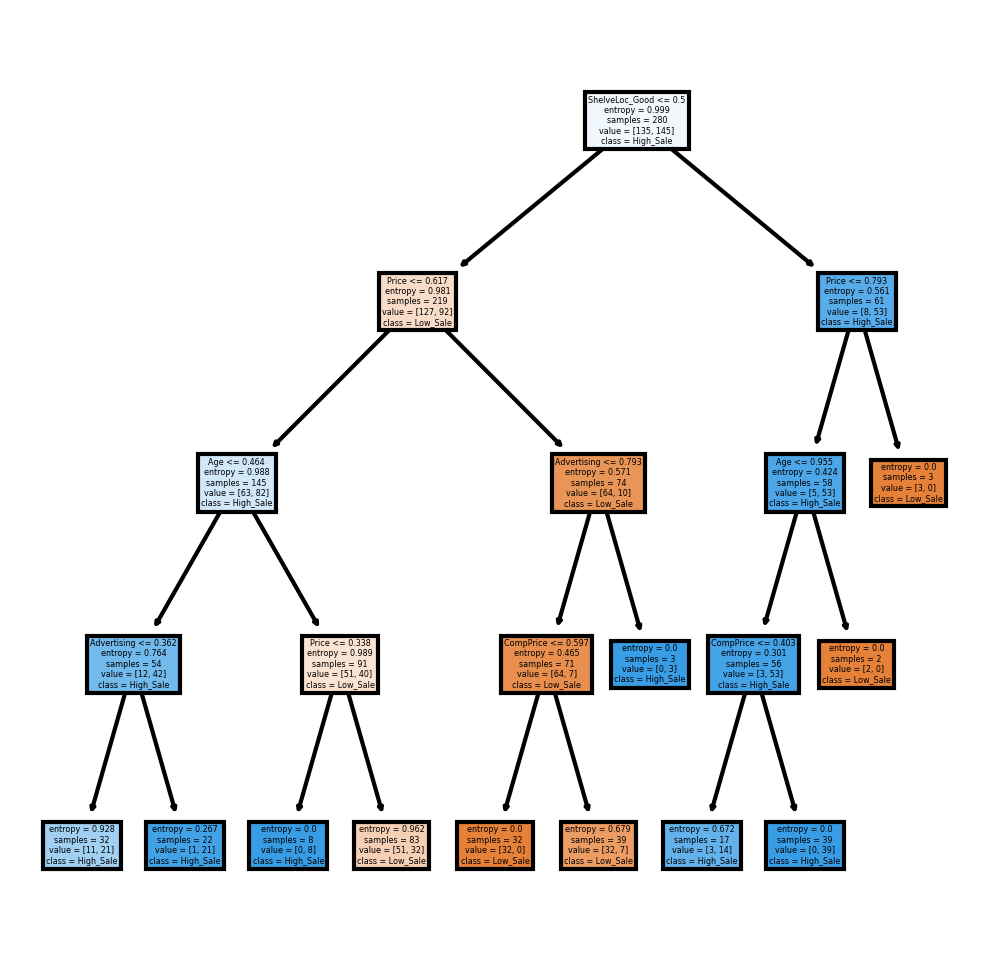

In [ ]:
fn = ["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "Education", "ShelveLoc_Good", "ShelveLoc_Medium", "Urban_Yes", "US_Yes"]
cn = ["Low_Sale","High_Sale"]
fig, axis = plt.subplots(nrows = 1, ncols = 1, figsize=(4,4), dpi = 300)
tree.plot_tree(model_1, feature_names = fn, class_names = cn, filled = True);


In [ ]:
pred = model_1.predict(x_test)
pred

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0.])

In [ ]:
pd.crosstab(y_test, pred)

col_0,0.0,1.0
sales_High_Sale,,
0.0,50,16
1.0,13,41


In [ ]:
np.mean(pred==y_test)*100

75.83333333333333

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.79      0.76      0.78        66
         1.0       0.72      0.76      0.74        54

    accuracy                           0.76       120
   macro avg       0.76      0.76      0.76       120
weighted avg       0.76      0.76      0.76       120



**Building Decision Tree using "CART"**

In [ ]:
model_2 = DecisionTreeClassifier(criterion = "gini", max_depth=4)
model_2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

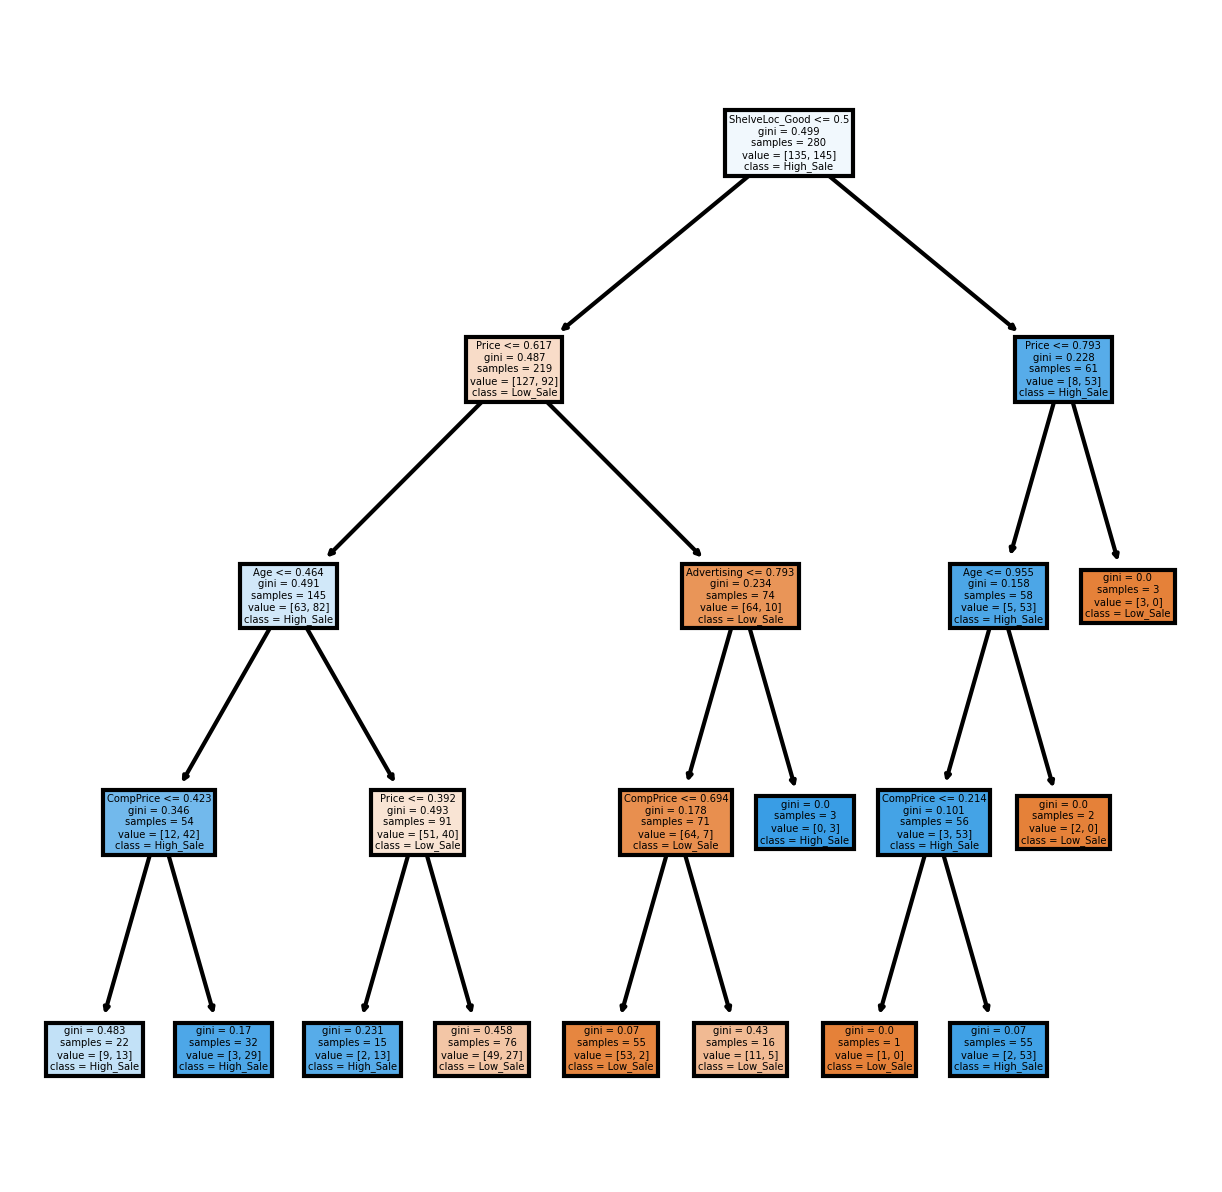

In [ ]:
fn = ["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "Education", "ShelveLoc_Good", "ShelveLoc_Medium", "Urban_Yes", "US_Yes"]
cn = ["Low_Sale","High_Sale"]
fig, axis = plt.subplots(nrows = 1, ncols = 1, figsize=(5,5), dpi = 300)
tree.plot_tree(model_2, feature_names = fn, class_names = cn, filled = True);


In [ ]:
preds = model_1.predict(x_test)
preds

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0.])

In [ ]:
pd.crosstab(y_test, pred)

col_0,0.0,1.0
sales_High_Sale,,
0.0,50,16
1.0,13,41


In [ ]:
np.mean(preds==y_test)*100

75.83333333333333

In [ ]:
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

         0.0       0.79      0.76      0.78        66
         1.0       0.72      0.76      0.74        54

    accuracy                           0.76       120
   macro avg       0.76      0.76      0.76       120
weighted avg       0.76      0.76      0.76       120



Output Result:
1) We have prepared the decision tree model on company data in order to know about the segment or attributes causes high sale.

2) We have prepared model_1 and model_2 using both Entropy and Gini Impurity    methods respectively.

3) We have got accuracy score for model_1 is 75.83% and for model_2 is 75.0%.